In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import solve

# Problem 1

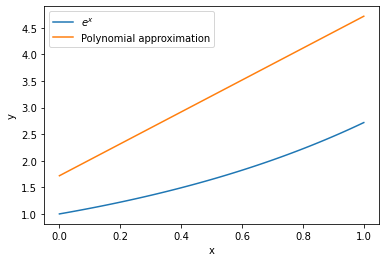

In [58]:
x = np.linspace(0, 1, 101)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, np.exp(x), label=r'$e^x$')
plt.plot(x, 3*x + np.e - 1, label='Polynomial approximation')
plt.legend()
plt.savefig('problem1.pdf')
plt.show()

# Problem 3e

In [3]:
def vandermonde(x, k):
    '''
    Function for initializing the vandermonde matrix
    '''
    vm = np.empty((x.shape[0], k+1))
    for i in range(k+1):
        vm[:, i] = x**i
    return vm

def piecewisepol(f, a, b, N, k):
    '''
    Performs polynomial interpolation with given parameters
    '''
    dN = (b-a)/N
    k = int(k)
    k2 = 100
    interpol = np.zeros(N*(k2))
    x = np.linspace(a, b, N*k2)
    int1 = np.linspace(a, a + dN, k+1)
    int2 = np.linspace(a, a + dN, k2)
    
    for i in range(N):
        f_vals = f(int1)
        vm = vandermonde(int1, k)
        coeffs = solve(vm, f_vals)
        vm = vandermonde(int2, k)
        interpol[i*k2: k2*(i + 1)]= np.matmul(vm, coeffs)
        int1 += dN
        int2 += dN    
        
    return x, interpol

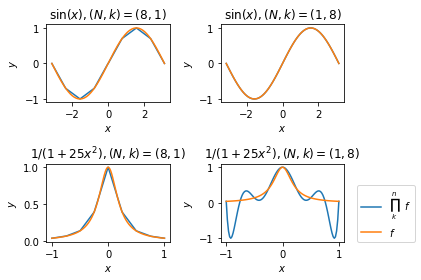

In [53]:
'''
Snippet for creating figures
'''

f = lambda x: np.sin(x)
a = -np.pi
b = np.pi


fig, ((ax11, ax12), (ax21, ax22)) = plt.subplots(2, 2)

polint = piecewisepol(f, a, b, 8, 1)
ax11.set_xlabel(r'$x$')
ax11.set_ylabel(r'$y$')
ax11.set_title(r'$\sin(x), (N, k) = (8, 1)$')
ax11.plot(polint[0], polint[1], label=r'$a$')
ax11.plot(polint[0], f(polint[0]))


polint = piecewisepol(f, a, b, 1, 8)
ax12.set_xlabel(r'$x$')
ax12.set_ylabel(r'$y$')
ax12.set_title(r'$\sin(x), (N, k) = (1, 8)$')
ax12.plot(polint[0], polint[1])
ax12.plot(polint[0], f(polint[0]))

f = lambda x: 1/(1 + 25*x**2)
a = -1
b = 1

polint = piecewisepol(f, a, b, 8, 1)
ax21.set_xlabel(r'$x$')
ax21.set_ylabel(r'$y$')
ax21.set_title(r'$ 1/(1 + 25x^2) , (N, k) = (8, 1)$')
ax21.plot(polint[0], polint[1])
ax21.plot(polint[0], f(polint[0]))

polint = piecewisepol(f, a, b, 1, 8)
ax22.set_xlabel(r'$x$')
ax22.set_ylabel(r'$y$')
ax22.set_title(r'$1/(1 + 25x^2) , (N, k) = (1, 8)$')
ax22.plot(polint[0], polint[1], label=r'$\prod_k^n$' + '  ' + r'$f$')
ax22.plot(polint[0], f(polint[0]), label=r'$f$')


ax22.legend(loc=(1.1, 0))

plt.tight_layout()
plt.savefig('oblig1_3e.pdf')
plt.show()





